In [1]:
from flickrapi import FlickrAPI
import pandas as pd
import sys
import webbrowser
from xml.etree import ElementTree as ET
import matplotlib.pyplot as plt
import json
import urllib.request as uRequest
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen as uRequest
from urllib.request import urlretrieve as retrieve

In [2]:
#Sfruttiamo le API per prendere le foto del profilo e dei gruppi coinvolti

key='8044708142907ea81eaa37a7f09fe438' #chiave API
secret='41e5fc7070d84667' # segreto API


def get_valid_permission(type_permission,flickr):
     if not flickr.token_valid(perms=type_permission):
        flickr.get_request_token(oauth_callback="oob")
        authorize_url=flickr.auth_url(perms=type_permission)
        webbrowser.open_new_tab(authorize_url)
        verifier=str(input("Verifier code: "))
        flickr.get_access_token(verifier)
        
def get_permission_flick(key,secret):
    flickr=FlickrAPI(key,secret)
    get_valid_permission("read",flickr)
    get_valid_permission("write",flickr)
    
    return flickr


print("Otteniamo l'oggetto flickr")
flickr=get_permission_flick(key,secret)

Otteniamo l'oggetto flickr


In [3]:
#funzioni che servono a scaricare una singola immagine.

def download_single_image(photo_id,index,path_middle):
    response_photo=flickr.photos.getInfo(photo_id=photo_id,format="json")
    response_json=response_photo.decode()
    url_prova=json.loads(response_json)
    
    
    photo_url=url_prova['photo']['urls']['url'][0]['_content']
    photo_url_retrieve=photo_url
    
    
    if index==-1: ## -1 RITORNA SOLO L'URL
        return photo_url
    download_image_from_url(photo_url_retrieve,index,path_middle,photo_id)
    
    
def download_image_from_url(photo_url,index,path_middle,photo_id):
    new_url=photo_url
    try:
        page_html=uRequest(new_url)
    except Exception :
        return
    page_soup=soup(page_html)
    try:
        container_img=page_soup.findAll("img")[0]
    except Exception:
        return
    #print(photo_url,index,path_middle)
    print("https:"+container_img['src'],"./"+path_middle+"/"+str(photo_id)+".jpg")
    retrieve("https:"+container_img['src'],"./"+path_middle+"/"+str(photo_id)+".jpg")

In [ ]:
import json
#PRENDIAMO UN PO' DI IMMAGINI DEL PROFILO
user_id_input="38954353@N06" ##6000 foto
response=flickr.people.getPhotos(format="json",user_id=user_id_input,per_page=10)
#print(response)
resp=json.loads(response.decode())
print(type(resp))
print(resp.keys())
total_photo=resp['photos']['total']
total_page=resp['photos']['pages']
i=1
print(total_photo) #tutte le foto
print(total_page) # tutte le pagine

total_page=1 
list_id_photos_profile=[]
##l'algoritmo qui sotto funziona anche per prendere tutte le immagini,richiamando flickr.people.getPhotos()
#con il parametro page che viene incrementato ad ogni ciclo

while i<total_page+1:
    for j in range(len(resp['photos']['photo'])):
        list_id_photos_profile.append(resp['photos']['photo'][j]['id'])


#print("STEP")
i=i+1
response=flickr.people.getPhotos(format="json",user_id=user_id_input,per_page=200,page=i) #
resp=json.loads(response.decode())
# le scarico
index=0
for item in list_id_photos_profile:
    download_single_image(item,index,"progetto 2021")
    index+=1

<class 'dict'>
dict_keys(['photos', 'stat'])
3744
19


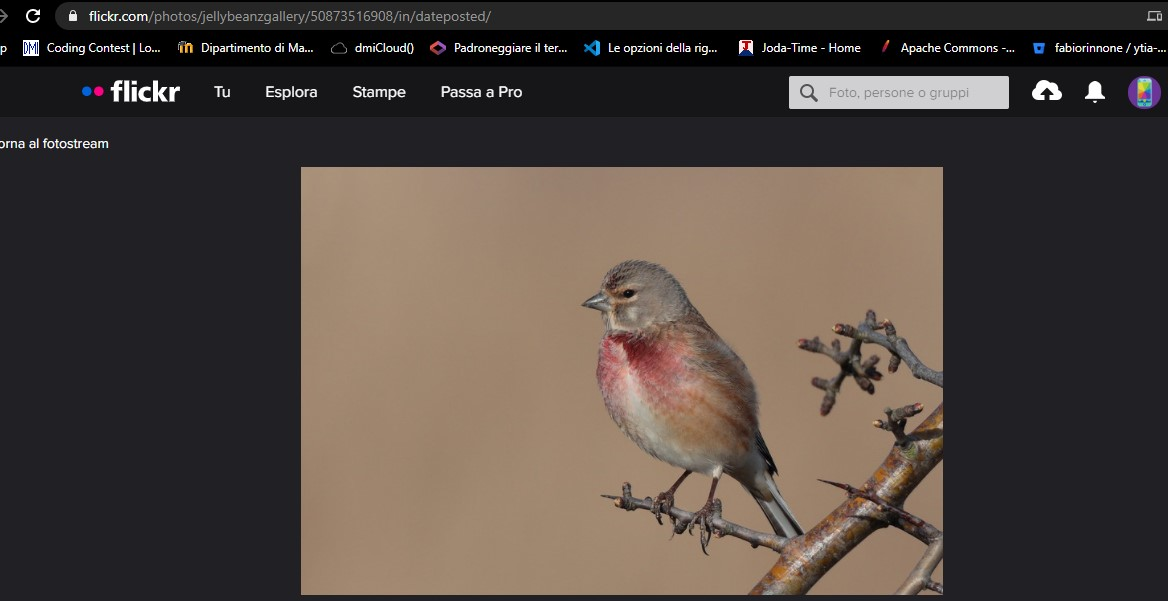

In [4]:
from IPython.display import Image
Image(filename='C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/3 immagini/50873516908.jpg')

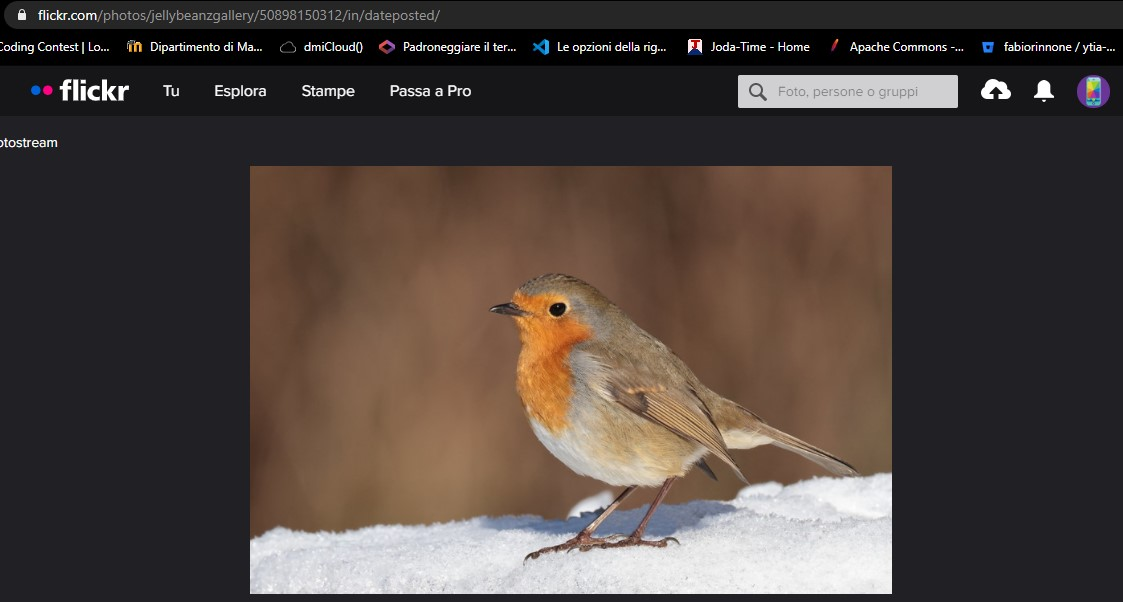

In [5]:
from IPython.display import Image
Image(filename='C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/3 immagini/50898150312.jpg')

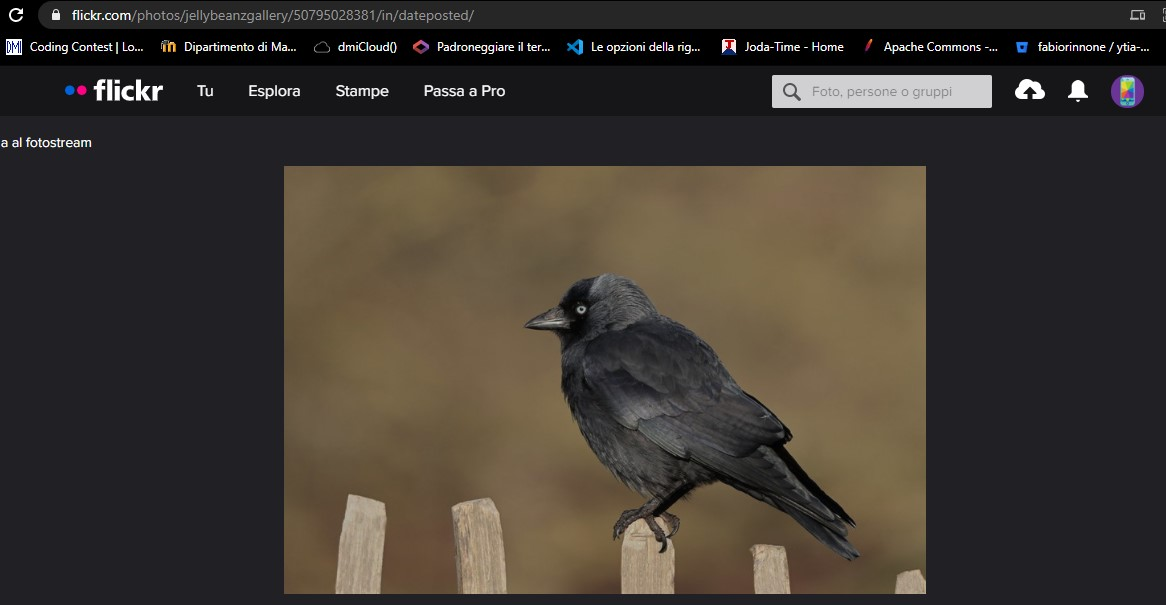

In [6]:
from IPython.display import Image
Image(filename='C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/3 immagini/50795028381.jpg')

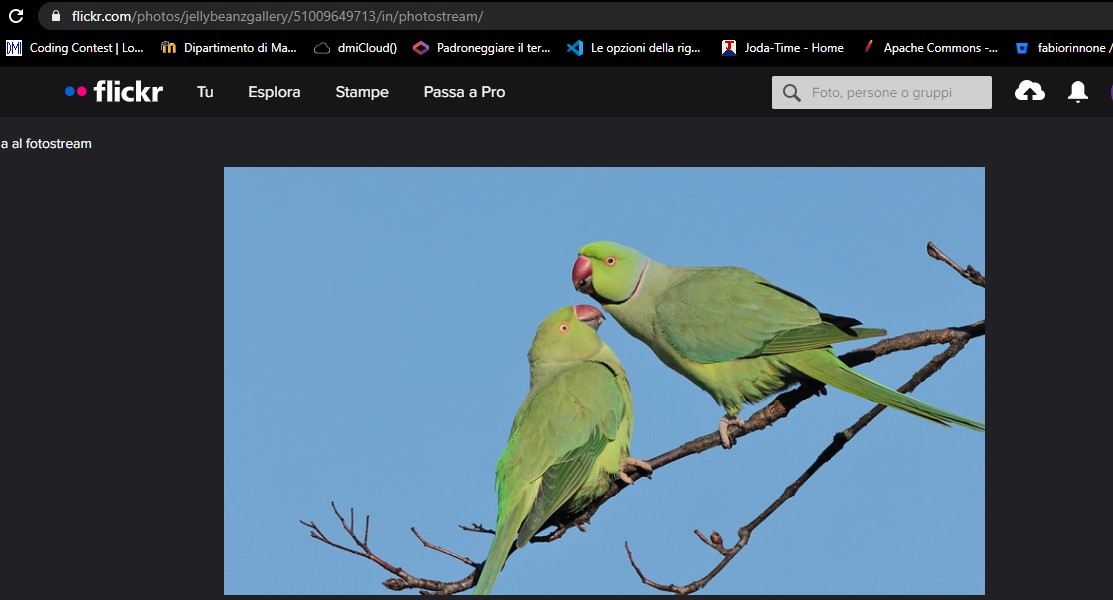

In [7]:
from IPython.display import Image
Image(filename='C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/3 immagini/51009649713.jpg')

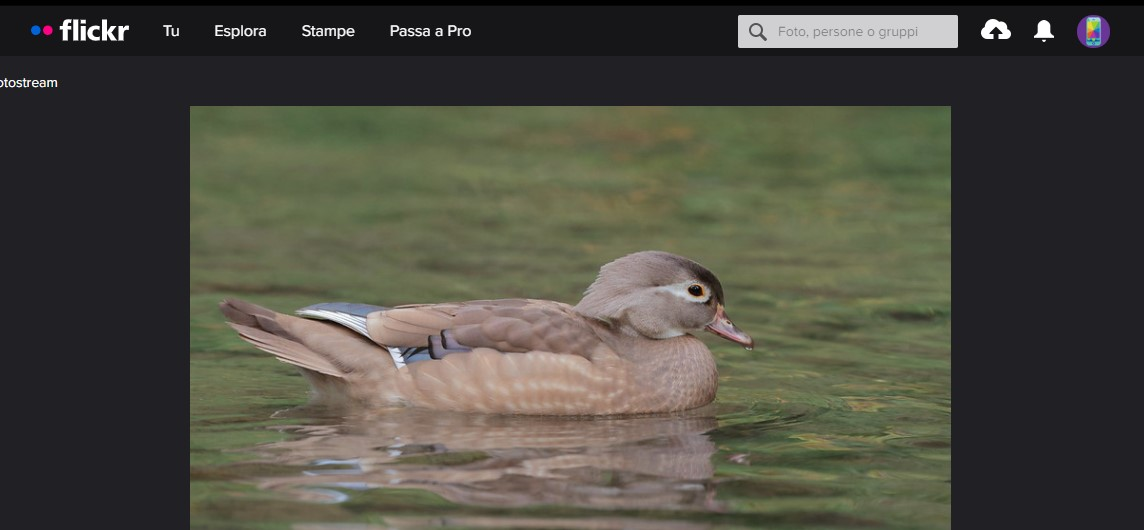

In [8]:
from IPython.display import Image
Image(filename='C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/3 immagini/51023549821.jpg')

In [10]:
import os
import pandas as pd
from skimage import io
from cyvlfeat.sift import dsift
from sklearn.cluster import MiniBatchKMeans
import numpy as np


##Prendere in numero di likes di una foto
def get_favorities(item):
    likes=(flickr.photos.getFavorites(photo_id=item,format="json"))
    try:
        total_likes=(json.loads(likes.decode()))['photo']['total']
    except :
        return 1
    return int(total_likes)


file_name=os.listdir("C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/")
print (file_name)
file_name.remove("Project Social Media.ipynb")
file_name.remove(".ipynb_checkpoints")
file_name.remove("x_user_profile.pkl")
file_name.remove("group_profile.pkl")
file_name.remove("mean_group_vector.pkl")
file_name.remove("Project Social Media (1).ipynb")
lista=[]
for f in file_name: 
    for g in os.listdir (f): 
        lista.append(g)
    
print (lista)
    
    
likes_user=[ get_favorities(int(x[:-4])) for x in lista  ]
lista=[]
for f in file_name: 
    for g in os.listdir (f):
        lista.append (f+"/"+g)
file_name=["C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/" +x for x in lista]
data_user=pd.DataFrame(file_name,columns=["filename"])
print (data_user)
data_user['favorities']=likes_user
data_user['favorities']=data_user['favorities'].astype(int)

#print(data_user['filename'][0])

print(data_user['filename'].iloc[0])
#print(data_user.shape)


from tqdm import tqdm
def extract_and_describe(data, size=5, step=10):
    descriptors=[]
    for i, row in tqdm(data.iterrows(), "Extracting/Describing Patches", total=len(data)):
        print (row['filename'])
        im = io.imread(row['filename'], as_gray=True)
        _, desc = dsift(im, size=size, step=step)#descrittore sift
        descriptors.append(desc)
        #print(desc.shape)
    
    return np.vstack(descriptors)
    


dim_vocabolary=750 ##DIMENSIONE VOCABOLARIO
train_descriptors = extract_and_describe(data_user)
kmeans=MiniBatchKMeans(dim_vocabolary)##750 dim vocabolario
kmeans.fit(train_descriptors)

def load_and_describe(filename, size=5, step=10, kmeans=kmeans):
    im = io.imread(filename,as_gray=True)
    _, descriptors = dsift(im, size=size, step=step)
    tokens = kmeans.predict(descriptors)
    return tokens

['.ipynb_checkpoints', '100 Strangers', '3 immagini', 'Amazing beauty - NO PEOPLE', 'Birding for everyone! (Field Guide of the World)', 'Black and White', 'Centre of Attention', 'Dog Days', 'Fantastic Wildlife', 'FlickrCentral', 'group_profile.pkl', 'mean_group_vector.pkl', 'Project Social Media (1).ipynb', 'Project Social Media.ipynb', 'Springwatch', 'The Fog and The Rain', 'Utata', 'x_user_profile.pkl']
['51015563247.jpg', '51021447073.jpg', '51023497797.jpg', '51024884431.jpg', '51027876598.jpg', '51032194148.jpg', '51039980151.jpg', '51042422631.jpg', '51042526316.jpg', '51045027393.jpg', '51048375247.jpg', '50795028381.jpg', '50873516908.jpg', '50898150312.jpg', '51009649713.jpg', '51022816283.jpg', '51023549821.jpg', '51029568813.jpg', '51030296516.jpg', '51035674236.jpg', '51035781657.jpg', '51040668568.jpg', '27598743673.jpg', '32048986862.jpg', '51008484332.jpg', '51012682728.jpg', '51013205771.jpg', '51013480617.jpg', '51023538852.jpg', '51040467123.jpg', '8722621707.jpg', '8

Extracting/Describing Patches:   0%|                                                           | 0/202 [00:00<?, ?it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/100 Strangers/51015563247.jpg


Extracting/Describing Patches:   1%|▌                                                  | 2/202 [00:00<01:00,  3.29it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/100 Strangers/51021447073.jpg


Extracting/Describing Patches:   1%|▊                                                  | 3/202 [00:00<00:47,  4.21it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/100 Strangers/51023497797.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/100 Strangers/51024884431.jpg


Extracting/Describing Patches:   2%|█▎                                                 | 5/202 [00:01<00:37,  5.26it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/100 Strangers/51027876598.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/100 Strangers/51032194148.jpg


Extracting/Describing Patches:   3%|█▊                                                 | 7/202 [00:01<00:40,  4.78it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/100 Strangers/51039980151.jpg


Extracting/Describing Patches:   4%|██                                                 | 8/202 [00:01<00:37,  5.19it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/100 Strangers/51042422631.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/100 Strangers/51042526316.jpg


Extracting/Describing Patches:   5%|██▍                                               | 10/202 [00:02<00:35,  5.37it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/100 Strangers/51045027393.jpg


Extracting/Describing Patches:   5%|██▋                                               | 11/202 [00:02<00:35,  5.31it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/100 Strangers/51048375247.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/3 immagini/50795028381.jpg


Extracting/Describing Patches:   6%|██▉                                               | 12/202 [00:04<02:06,  1.50it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/3 immagini/50873516908.jpg


Extracting/Describing Patches:   6%|███▏                                              | 13/202 [00:05<02:44,  1.15it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/3 immagini/50898150312.jpg


Extracting/Describing Patches:   7%|███▍                                              | 14/202 [00:07<03:29,  1.11s/it]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/3 immagini/51009649713.jpg


Extracting/Describing Patches:   7%|███▋                                              | 15/202 [00:08<03:58,  1.28s/it]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/3 immagini/51022816283.jpg


Extracting/Describing Patches:   8%|███▉                                              | 16/202 [00:10<04:15,  1.38s/it]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/3 immagini/51023549821.jpg


Extracting/Describing Patches:   8%|████▏                                             | 17/202 [00:11<04:25,  1.44s/it]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/3 immagini/51029568813.jpg


Extracting/Describing Patches:   9%|████▍                                             | 18/202 [00:13<04:44,  1.55s/it]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/3 immagini/51030296516.jpg


Extracting/Describing Patches:   9%|████▋                                             | 19/202 [00:15<04:54,  1.61s/it]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/3 immagini/51035674236.jpg


Extracting/Describing Patches:  10%|████▉                                             | 20/202 [00:17<05:17,  1.74s/it]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/3 immagini/51035781657.jpg


Extracting/Describing Patches:  10%|█████▏                                            | 21/202 [00:19<05:26,  1.80s/it]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/3 immagini/51040668568.jpg


Extracting/Describing Patches:  11%|█████▍                                            | 22/202 [00:21<05:46,  1.92s/it]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Amazing beauty - NO PEOPLE/27598743673.jpg


Extracting/Describing Patches:  11%|█████▋                                            | 23/202 [00:21<04:14,  1.42s/it]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Amazing beauty - NO PEOPLE/32048986862.jpg


Extracting/Describing Patches:  12%|█████▉                                            | 24/202 [00:22<03:08,  1.06s/it]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Amazing beauty - NO PEOPLE/51008484332.jpg


Extracting/Describing Patches:  13%|██████▍                                           | 26/202 [00:22<01:47,  1.64it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Amazing beauty - NO PEOPLE/51012682728.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Amazing beauty - NO PEOPLE/51013205771.jpg


Extracting/Describing Patches:  13%|██████▋                                           | 27/202 [00:22<01:26,  2.02it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Amazing beauty - NO PEOPLE/51013480617.jpg


Extracting/Describing Patches:  14%|███████▏                                          | 29/202 [00:23<01:00,  2.87it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Amazing beauty - NO PEOPLE/51023538852.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Amazing beauty - NO PEOPLE/51040467123.jpg


Extracting/Describing Patches:  15%|███████▋                                          | 31/202 [00:23<00:39,  4.33it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Amazing beauty - NO PEOPLE/8722621707.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Amazing beauty - NO PEOPLE/8723743440.jpg


Extracting/Describing Patches:  16%|███████▉                                          | 32/202 [00:23<00:34,  4.96it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Birding for everyone! (Field Guide of the World)/31621560394.jpg


Extracting/Describing Patches:  17%|████████▍                                         | 34/202 [00:23<00:34,  4.92it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Birding for everyone! (Field Guide of the World)/31637511293.jpg


Extracting/Describing Patches:  17%|████████▋                                         | 35/202 [00:24<00:32,  5.10it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Birding for everyone! (Field Guide of the World)/32383228906.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Birding for everyone! (Field Guide of the World)/32407795666.jpg


Extracting/Describing Patches:  18%|█████████▏                                        | 37/202 [00:24<00:32,  5.14it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Birding for everyone! (Field Guide of the World)/50123452843.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Birding for everyone! (Field Guide of the World)/51037071621.jpg


Extracting/Describing Patches:  19%|█████████▍                                        | 38/202 [00:24<00:34,  4.79it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Birding for everyone! (Field Guide of the World)/51040068462.jpg


Extracting/Describing Patches:  19%|█████████▋                                        | 39/202 [00:25<00:34,  4.79it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Birding for everyone! (Field Guide of the World)/51042486728.jpg


Extracting/Describing Patches:  20%|██████████▏                                       | 41/202 [00:25<00:32,  4.98it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Birding for everyone! (Field Guide of the World)/51042488953.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Birding for everyone! (Field Guide of the World)/51043878871.jpg


Extracting/Describing Patches:  21%|██████████▋                                       | 43/202 [00:25<00:30,  5.24it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Birding for everyone! (Field Guide of the World)/51044122201.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Birding for everyone! (Field Guide of the World)/51047340737.jpg


Extracting/Describing Patches:  22%|███████████▏                                      | 45/202 [00:26<00:31,  4.98it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Birding for everyone! (Field Guide of the World)/51047657673.jpg


Extracting/Describing Patches:  23%|███████████▍                                      | 46/202 [00:26<00:29,  5.27it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Birding for everyone! (Field Guide of the World)/51047811623.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Birding for everyone! (Field Guide of the World)/51048469862.jpg


Extracting/Describing Patches:  24%|███████████▉                                      | 48/202 [00:26<00:27,  5.56it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Birding for everyone! (Field Guide of the World)/51048541891.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Birding for everyone! (Field Guide of the World)/51048542136.jpg


Extracting/Describing Patches:  24%|████████████▏                                     | 49/202 [00:26<00:30,  5.07it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Birding for everyone! (Field Guide of the World)/51048542201.jpg


Extracting/Describing Patches:  25%|████████████▍                                     | 50/202 [00:27<00:31,  4.85it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Birding for everyone! (Field Guide of the World)/51048626577.jpg


Extracting/Describing Patches:  25%|████████████▌                                     | 51/202 [00:27<00:31,  4.73it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Birding for everyone! (Field Guide of the World)/7058104785.jpg


Extracting/Describing Patches:  26%|████████████▊                                     | 52/202 [00:27<00:32,  4.68it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Black and White/15441999253.jpg


Extracting/Describing Patches:  27%|█████████████▎                                    | 54/202 [00:28<00:29,  5.00it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Black and White/30632048153.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Black and White/49217298716.jpg


Extracting/Describing Patches:  28%|█████████████▊                                    | 56/202 [00:28<00:25,  5.68it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Black and White/49360645772.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Black and White/50343091301.jpg


Extracting/Describing Patches:  29%|██████████████▎                                   | 58/202 [00:28<00:22,  6.42it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Black and White/50606228086.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Black and White/50625272853.jpg


Extracting/Describing Patches:  30%|██████████████▊                                   | 60/202 [00:28<00:22,  6.22it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Black and White/50863115603.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Black and White/51031403621.jpg


Extracting/Describing Patches:  30%|███████████████                                   | 61/202 [00:29<00:24,  5.69it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Black and White/51043083408.jpg


Extracting/Describing Patches:  31%|███████████████▌                                  | 63/202 [00:29<00:24,  5.76it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Black and White/51043614828.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Black and White/51043742932.jpg


Extracting/Describing Patches:  32%|████████████████                                  | 65/202 [00:29<00:23,  5.89it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Black and White/51043844267.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Black and White/51043884947.jpg


Extracting/Describing Patches:  33%|████████████████▎                                 | 66/202 [00:29<00:20,  6.61it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Black and White/51045527208.jpg


Extracting/Describing Patches:  33%|████████████████▌                                 | 67/202 [00:30<00:22,  6.01it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Black and White/51045610913.jpg


Extracting/Describing Patches:  34%|█████████████████                                 | 69/202 [00:30<00:22,  5.96it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Black and White/51046296426.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Black and White/51046304032.jpg


Extracting/Describing Patches:  35%|█████████████████▌                                | 71/202 [00:30<00:20,  6.37it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Black and White/51046324522.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Black and White/51046428187.jpg


Extracting/Describing Patches:  36%|██████████████████                                | 73/202 [00:31<00:20,  6.15it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Centre of Attention/50999428688.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Centre of Attention/51000130796.jpg


Extracting/Describing Patches:  37%|██████████████████▌                               | 75/202 [00:31<00:21,  5.82it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Centre of Attention/51000248697.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Centre of Attention/51009091813.jpg


Extracting/Describing Patches:  38%|██████████████████▊                               | 76/202 [00:31<00:21,  5.89it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Centre of Attention/51014991463.jpg


Extracting/Describing Patches:  39%|███████████████████▎                              | 78/202 [00:32<00:23,  5.31it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Centre of Attention/51014991508.jpg


Extracting/Describing Patches:  39%|███████████████████▌                              | 79/202 [00:32<00:23,  5.20it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Centre of Attention/51016502041.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Centre of Attention/51020120353.jpg


Extracting/Describing Patches:  40%|███████████████████▊                              | 80/202 [00:32<00:25,  4.72it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Centre of Attention/51030972967.jpg


Extracting/Describing Patches:  40%|████████████████████                              | 81/202 [00:32<00:26,  4.62it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Centre of Attention/51047311721.jpg


Extracting/Describing Patches:  41%|████████████████████▌                             | 83/202 [00:33<00:23,  5.04it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Dog Days/38779516070.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Dog Days/49040332246.jpg


Extracting/Describing Patches:  42%|████████████████████▊                             | 84/202 [00:33<00:21,  5.42it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Dog Days/49610566858.jpg


Extracting/Describing Patches:  43%|█████████████████████▎                            | 86/202 [00:33<00:21,  5.38it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Dog Days/50505708731.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Dog Days/50516130226.jpg


Extracting/Describing Patches:  43%|█████████████████████▌                            | 87/202 [00:33<00:22,  5.22it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Dog Days/50612060421.jpg


Extracting/Describing Patches:  44%|██████████████████████                            | 89/202 [00:34<00:21,  5.26it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Dog Days/51001004037.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Dog Days/51009506971.jpg


Extracting/Describing Patches:  45%|██████████████████████▌                           | 91/202 [00:34<00:22,  4.84it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Dog Days/51009507036.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Dog Days/51017566343.jpg


Extracting/Describing Patches:  46%|███████████████████████                           | 93/202 [00:35<00:22,  4.87it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Dog Days/51021788366.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Dog Days/51035473428.jpg


Extracting/Describing Patches:  47%|███████████████████████▌                          | 95/202 [00:35<00:20,  5.15it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Dog Days/51041986037.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Dog Days/51043927248.jpg


Extracting/Describing Patches:  48%|████████████████████████                          | 97/202 [00:35<00:19,  5.52it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Dog Days/51045174638.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Dog Days/51045714153.jpg


Extracting/Describing Patches:  49%|████████████████████████▎                         | 98/202 [00:36<00:19,  5.35it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Dog Days/51045964393.jpg


Extracting/Describing Patches:  50%|████████████████████████▌                        | 101/202 [00:36<00:15,  6.70it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Dog Days/51046603566.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Dog Days/51046665416.jpg


Extracting/Describing Patches:  50%|████████████████████████▋                        | 102/202 [00:36<00:15,  6.26it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Dog Days/51046755691.jpg


Extracting/Describing Patches:  51%|████████████████████████▉                        | 103/202 [00:36<00:15,  6.31it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Dog Days/51046878761.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Dog Days/51046903092.jpg


Extracting/Describing Patches:  52%|█████████████████████████▍                       | 105/202 [00:37<00:16,  5.75it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Dog Days/51046935771.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Dog Days/51047056797.jpg


Extracting/Describing Patches:  53%|█████████████████████████▉                       | 107/202 [00:37<00:17,  5.50it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Dog Days/51047124427.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Dog Days/51047370017.jpg


Extracting/Describing Patches:  54%|██████████████████████████▍                      | 109/202 [00:37<00:15,  6.19it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Dog Days/51047395593.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Dog Days/51047467362.jpg


Extracting/Describing Patches:  54%|██████████████████████████▋                      | 110/202 [00:38<00:15,  6.00it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Dog Days/51047474762.jpg


Extracting/Describing Patches:  55%|██████████████████████████▉                      | 111/202 [00:38<00:16,  5.58it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Dog Days/51047824123.jpg


Extracting/Describing Patches:  56%|███████████████████████████▍                     | 113/202 [00:38<00:16,  5.55it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Dog Days/51048104497.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Fantastic Wildlife/50997060659.jpg


Extracting/Describing Patches:  57%|███████████████████████████▉                     | 115/202 [00:38<00:14,  6.15it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Fantastic Wildlife/51034566766.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Fantastic Wildlife/51038836642.jpg


Extracting/Describing Patches:  58%|████████████████████████████▍                    | 117/202 [00:39<00:14,  5.93it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Fantastic Wildlife/51040252662.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Fantastic Wildlife/51042566183.jpg


Extracting/Describing Patches:  59%|████████████████████████████▊                    | 119/202 [00:39<00:14,  5.70it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Fantastic Wildlife/51043189528.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Fantastic Wildlife/51045397286.jpg


Extracting/Describing Patches:  60%|█████████████████████████████▎                   | 121/202 [00:40<00:15,  5.23it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Fantastic Wildlife/51045750771.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Fantastic Wildlife/51046176373.jpg


Extracting/Describing Patches:  61%|█████████████████████████████▊                   | 123/202 [00:40<00:13,  5.77it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Fantastic Wildlife/51046455033.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Fantastic Wildlife/51047127292.jpg


Extracting/Describing Patches:  61%|██████████████████████████████                   | 124/202 [00:40<00:12,  6.33it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Fantastic Wildlife/51047140271.jpg


Extracting/Describing Patches:  62%|██████████████████████████████▌                  | 126/202 [00:40<00:12,  6.30it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Fantastic Wildlife/51047205496.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Fantastic Wildlife/51047222297.jpg


Extracting/Describing Patches:  63%|███████████████████████████████                  | 128/202 [00:41<00:13,  5.61it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Fantastic Wildlife/51047971942.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Fantastic Wildlife/51048028192.jpg


Extracting/Describing Patches:  64%|███████████████████████████████▌                 | 130/202 [00:41<00:13,  5.49it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Fantastic Wildlife/51048085512.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Fantastic Wildlife/51048469862.jpg


Extracting/Describing Patches:  65%|████████████████████████████████                 | 132/202 [00:42<00:14,  4.93it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Fantastic Wildlife/51048560766.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/FlickrCentral/50304104316.jpg


Extracting/Describing Patches:  66%|████████████████████████████████▌                | 134/202 [00:42<00:13,  5.21it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/FlickrCentral/50412258982.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/FlickrCentral/50480430328.jpg


Extracting/Describing Patches:  67%|████████████████████████████████▋                | 135/202 [00:42<00:11,  5.90it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/FlickrCentral/50846036201.jpg


Extracting/Describing Patches:  68%|█████████████████████████████████▏               | 137/202 [00:43<00:12,  5.40it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/FlickrCentral/50964875833.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/FlickrCentral/50993914223.jpg


Extracting/Describing Patches:  69%|█████████████████████████████████▋               | 139/202 [00:43<00:11,  5.52it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/FlickrCentral/50996816284.jpg


Extracting/Describing Patches:  69%|█████████████████████████████████▉               | 140/202 [00:43<00:11,  5.48it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/FlickrCentral/50996820579.jpg


Extracting/Describing Patches:  70%|██████████████████████████████████▏              | 141/202 [00:43<00:11,  5.32it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/FlickrCentral/50996837419.jpg


Extracting/Describing Patches:  70%|██████████████████████████████████▍              | 142/202 [00:43<00:09,  6.07it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/FlickrCentral/51029438798.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/FlickrCentral/51030947437.jpg


Extracting/Describing Patches:  71%|██████████████████████████████████▉              | 144/202 [00:44<00:10,  5.63it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/FlickrCentral/51039421942.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/FlickrCentral/51042652738.jpg


Extracting/Describing Patches:  72%|███████████████████████████████████▏             | 145/202 [00:44<00:10,  5.24it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/FlickrCentral/51046968478.jpg


Extracting/Describing Patches:  73%|███████████████████████████████████▋             | 147/202 [00:44<00:10,  5.47it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/FlickrCentral/51047391651.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/FlickrCentral/51047760507.jpg


Extracting/Describing Patches:  74%|████████████████████████████████████▏            | 149/202 [00:45<00:09,  5.41it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/FlickrCentral/51047879238.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/FlickrCentral/51048592371.jpg


Extracting/Describing Patches:  74%|████████████████████████████████████▍            | 150/202 [00:45<00:09,  5.51it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/FlickrCentral/51048665037.jpg


Extracting/Describing Patches:  75%|████████████████████████████████████▋            | 151/202 [00:45<00:09,  5.28it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/FlickrCentral/51048694672.jpg


Extracting/Describing Patches:  75%|████████████████████████████████████▊            | 152/202 [00:45<00:09,  5.09it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Springwatch/50991032227.jpg


Extracting/Describing Patches:  76%|█████████████████████████████████████▎           | 154/202 [00:46<00:08,  5.58it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Springwatch/51006786207.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Springwatch/51012283223.jpg


Extracting/Describing Patches:  77%|█████████████████████████████████████▊           | 156/202 [00:46<00:08,  5.74it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Springwatch/51018682443.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Springwatch/51018993078.jpg


Extracting/Describing Patches:  78%|██████████████████████████████████████▎          | 158/202 [00:46<00:07,  5.89it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Springwatch/51019414421.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Springwatch/51022115313.jpg


Extracting/Describing Patches:  79%|██████████████████████████████████████▊          | 160/202 [00:47<00:06,  6.23it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Springwatch/51022322647.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Springwatch/51025651123.jpg


Extracting/Describing Patches:  80%|███████████████████████████████████████▎         | 162/202 [00:47<00:05,  7.03it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Springwatch/51025667083.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/The Fog and The Rain/16831373129.jpg


Extracting/Describing Patches:  81%|███████████████████████████████████████▌         | 163/202 [00:47<00:05,  7.56it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/The Fog and The Rain/45019030581.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/The Fog and The Rain/47983487182.jpg


Extracting/Describing Patches:  82%|████████████████████████████████████████▎        | 166/202 [00:47<00:04,  7.68it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/The Fog and The Rain/50804306212.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/The Fog and The Rain/51032048488.jpg


Extracting/Describing Patches:  83%|████████████████████████████████████████▊        | 168/202 [00:48<00:04,  7.10it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/The Fog and The Rain/51045883673.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/The Fog and The Rain/51046203128.jpg


Extracting/Describing Patches:  84%|████████████████████████████████████████▉        | 169/202 [00:48<00:05,  6.01it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/The Fog and The Rain/51046372393.jpg


Extracting/Describing Patches:  85%|█████████████████████████████████████████▍       | 171/202 [00:48<00:05,  5.99it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/The Fog and The Rain/51046832071.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/The Fog and The Rain/51046910106.jpg


Extracting/Describing Patches:  86%|█████████████████████████████████████████▉       | 173/202 [00:49<00:04,  5.84it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/The Fog and The Rain/51046945202.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/The Fog and The Rain/51047015221.jpg


Extracting/Describing Patches:  87%|██████████████████████████████████████████▍      | 175/202 [00:49<00:04,  6.27it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/The Fog and The Rain/51047053367.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/The Fog and The Rain/51047115007.jpg


Extracting/Describing Patches:  88%|██████████████████████████████████████████▉      | 177/202 [00:49<00:04,  5.86it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/The Fog and The Rain/51047746063.jpg


Extracting/Describing Patches:  88%|███████████████████████████████████████████▏     | 178/202 [00:49<00:03,  6.06it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/The Fog and The Rain/51048405787.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/The Fog and The Rain/51048552822.jpg


Extracting/Describing Patches:  89%|███████████████████████████████████████████▋     | 180/202 [00:50<00:03,  5.94it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/The Fog and The Rain/51048571106.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/The Fog and The Rain/51048586312.jpg


Extracting/Describing Patches:  90%|████████████████████████████████████████████▏    | 182/202 [00:50<00:03,  6.50it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/The Fog and The Rain/51048630702.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Utata/49401123973.jpg


Extracting/Describing Patches:  91%|████████████████████████████████████████████▋    | 184/202 [00:50<00:02,  6.42it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Utata/51034320718.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Utata/51042925221.jpg


Extracting/Describing Patches:  92%|█████████████████████████████████████████████    | 186/202 [00:51<00:02,  7.15it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Utata/51045582048.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Utata/51046097973.jpg


Extracting/Describing Patches:  93%|█████████████████████████████████████████████▌   | 188/202 [00:51<00:01,  7.14it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Utata/51046605768.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Utata/51046643461.jpg


Extracting/Describing Patches:  94%|██████████████████████████████████████████████   | 190/202 [00:51<00:01,  7.93it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Utata/51046986037.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Utata/51047051517.jpg


Extracting/Describing Patches:  95%|██████████████████████████████████████████████▌  | 192/202 [00:51<00:01,  6.73it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Utata/51047135021.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Utata/51047153371.jpg


Extracting/Describing Patches:  96%|███████████████████████████████████████████████  | 194/202 [00:52<00:01,  6.31it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Utata/51047184388.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Utata/51047212697.jpg


Extracting/Describing Patches:  97%|███████████████████████████████████████████████▎ | 195/202 [00:52<00:01,  6.14it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Utata/51047308118.jpg


Extracting/Describing Patches:  97%|███████████████████████████████████████████████▌ | 196/202 [00:52<00:01,  5.32it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Utata/51047832733.jpg


Extracting/Describing Patches:  98%|████████████████████████████████████████████████ | 198/202 [00:53<00:00,  5.47it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Utata/51047916641.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Utata/51048000767.jpg


Extracting/Describing Patches:  99%|████████████████████████████████████████████████▌| 200/202 [00:53<00:00,  5.89it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Utata/51048485236.jpg
C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Utata/51048693627.jpg


Extracting/Describing Patches: 100%|████████████████████████████████████████████████▊| 201/202 [00:53<00:00,  6.30it/s]

C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/Utata/6226012134.jpg


Extracting/Describing Patches: 100%|█████████████████████████████████████████████████| 202/202 [00:53<00:00,  3.76it/s]


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(tokenizer=load_and_describe,vocabulary=range(dim_vocabolary), use_idf=True)
user_vector_weight=tfidf.fit_transform(data_user['filename'])##rappresentazione pesata
x_user_vector=user_vector_weight.copy()##rappresentazione normale

In [12]:
for i in range(3): #num foto
    user_vector_weight[i]=user_vector_weight[i]*int(data_user['favorities'][i])## peso in base ai likes

In [13]:
#print(x_user_vector.shape)
mean_user_vector=x_user_vector.toarray() ##vettore medio user
mean_user_vector=mean_user_vector.mean(axis=0)
#VETTORE MEDIO PESATO
mean_user_vector_weighted=user_vector_weight.toarray() ##vettore medio user,pesato
mean_user_vector_weighted=user_vector_weight.sum(axis=0)
mean_user_vector_weighted=mean_user_vector_weighted/sum((data_user['favorities']))

In [14]:
import pickle
with open("x_user_profile.pkl",'wb') as out:
    pickle.dump({ #possiamo mettere le variabili che vogliamo salvare in un dizionario
    'x_train':x_user_vector,
    'x_weight':user_vector_weight,
    "x_mean":mean_user_vector,
    "x_mean_weight":mean_user_vector_weighted,
    'kmeans':kmeans},out)

In [15]:
with open("x_user_profile.pkl",'rb') as inp:
     data=pickle.load(inp)
print(data.keys())
x_user_vector=data['x_train']
mean_user_vector_weighted=data['x_mean_weight']

dict_keys(['x_train', 'x_weight', 'x_mean', 'x_mean_weight', 'kmeans'])


In [16]:
list_name=["Dog Days", "Fantastic Wildlife", "Centre of Attention","Black and White", "Amazing beauty - NO PEOPLE", "The Fog and The Rain", "100 Strangers", "Utata", "Springwatch", "Birding for everyone! (Field Guide of the World)", "FlickrCentral"]
list_id_group=["467849@N23", "745710@N21","33127255@N00", "16978849@N00","400176@N23","2932332@N23", "342582@N20", "81474450@N00", "718688@N23", "2356068@N22","34427469792@N01"]
print(len(list_name),len(list_id_group))

11 11


In [17]:
def get_group_photos(id_group):

    response=flickr.groups.pools.getPhotos(format="json",per_page=10,group_id=id_group)
    response=response.decode()
    response_json=json.loads(response)
    list_id_photo_group=[]
    #print (response_json['photos'])
    
    for item in response_json['photos']['photo']:
        list_id_photo_group.append(item['id'])
    return list_id_photo_group ##ritorna l'id delle foto nel gruppo



lista_gruppi=[]
for i in list_id_group:
    lista_gruppi.append(get_group_photos(i))

In [18]:
 print(len(lista_gruppi[1])) 

10


In [19]:
import os
for item in list_name:
    try:
        
        os.mkdir("C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/"+item)
        print("Directory " , item , " Created ")
    except FileExistsError:
        print("Directory " , item , " already exists")
#lista_gruppi[2]

Directory  Dog Days  already exists
Directory  Fantastic Wildlife  already exists
Directory  Centre of Attention  already exists
Directory  Black and White  already exists
Directory  Amazing beauty - NO PEOPLE  already exists
Directory  The Fog and The Rain  already exists
Directory  100 Strangers  already exists
Directory  Utata  already exists
Directory  Springwatch  already exists
Directory  Birding for everyone! (Field Guide of the World)  already exists
Directory  FlickrCentral  already exists


In [20]:
#Scarichiamo le foto
index_name=0
for item in lista_gruppi:
    for single_id in item:
        print(list_name[index_name])
        sr=list_name[index_name]
        print (sr)
        download_single_image(single_id,0,sr)
    index_name+=1

Dog Days
Dog Days
https://live.staticflickr.com/65535/51048941591_03208cb4de_n.jpg ./Dog Days/51048941591.jpg
Dog Days
Dog Days
https://live.staticflickr.com/65535/51048158558_185926bbeb_n.jpg ./Dog Days/51048158558.jpg
Dog Days
Dog Days
https://live.staticflickr.com/65535/51048812457_cb2ba73206_n.jpg ./Dog Days/51048812457.jpg
Dog Days
Dog Days
https://live.staticflickr.com/65535/51048697381_c411528401_n.jpg ./Dog Days/51048697381.jpg
Dog Days
Dog Days
https://live.staticflickr.com/65535/51047966693_2f93ab58e9_n.jpg ./Dog Days/51047966693.jpg
Dog Days
Dog Days
https://live.staticflickr.com/65535/51046324692_4727489559_n.jpg ./Dog Days/51046324692.jpg
Dog Days
Dog Days
https://live.staticflickr.com/65535/51047824123_81998034e2_n.jpg ./Dog Days/51047824123.jpg
Dog Days
Dog Days
https://live.staticflickr.com/65535/49040332246_303ba68e20_n.jpg ./Dog Days/49040332246.jpg
Dog Days
Dog Days
https://live.staticflickr.com/65535/51045174638_d29d7cf4c6_n.jpg ./Dog Days/51045174638.jpg
Dog Days
D

https://live.staticflickr.com/65535/50806482857_8897cddabe_n.jpg ./The Fog and The Rain/50806482857.jpg
100 Strangers
100 Strangers
https://live.staticflickr.com/65535/51048375247_12384e12c1_n.jpg ./100 Strangers/51048375247.jpg
100 Strangers
100 Strangers
https://live.staticflickr.com/65535/51045027393_ed6982db97_n.jpg ./100 Strangers/51045027393.jpg
100 Strangers
100 Strangers
https://live.staticflickr.com/65535/51042526316_54c7fb6ba1_n.jpg ./100 Strangers/51042526316.jpg
100 Strangers
100 Strangers
https://live.staticflickr.com/65535/51042422631_d340cb12f7_n.jpg ./100 Strangers/51042422631.jpg
100 Strangers
100 Strangers
https://live.staticflickr.com/65535/51032194148_aa0a67b942_n.jpg ./100 Strangers/51032194148.jpg
100 Strangers
100 Strangers
https://live.staticflickr.com/65535/51039980151_d249f0d931_n.jpg ./100 Strangers/51039980151.jpg
100 Strangers
100 Strangers
https://live.staticflickr.com/65535/51027876598_7129fa9348_n.jpg ./100 Strangers/51027876598.jpg
100 Strangers
100 Str

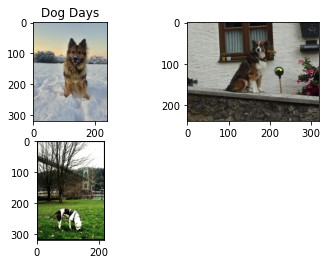

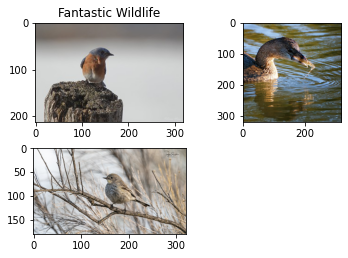

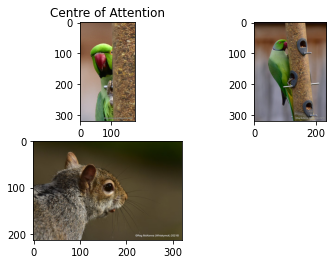

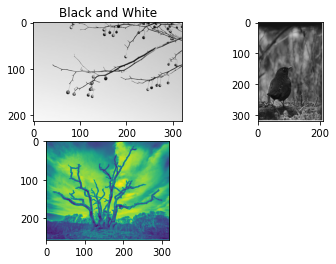

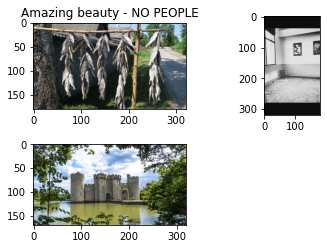

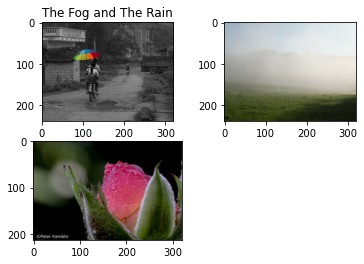

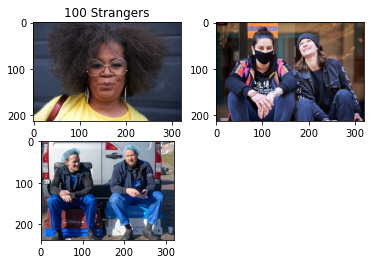

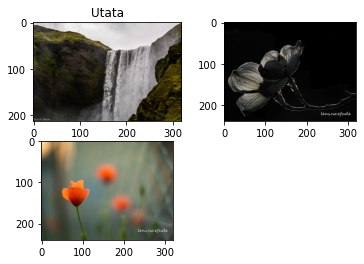

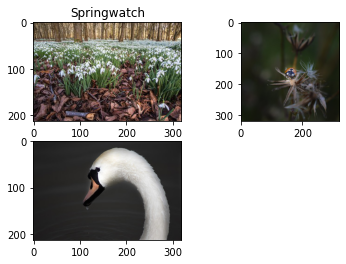

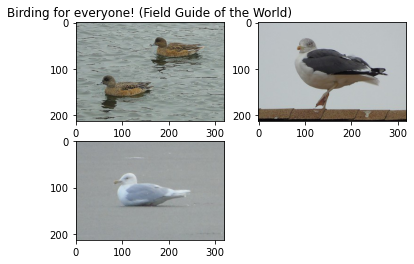

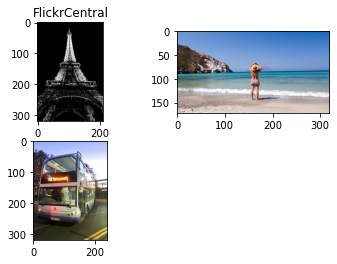

In [21]:
import os
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
f_path= "C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/"
for item in list_name:
    #print("Gruppo -->",item)
    temp_list=os.listdir(f_path+item)[:3]
    temp_list=[ np.uint8(mpimg.imread(f_path+item+"/" +x)) for x in temp_list]
    fig=plt.figure()
    fig.add_subplot(221)
    plt.imshow(temp_list[0])
    plt.title(item)

    
    fig.add_subplot(222)
    
    plt.imshow(temp_list[1])
    fig.add_subplot(223)
    
    
    plt.imshow(temp_list[2])
    #print(temp_list,item)

In [23]:
list_df=[]


#Creo i dataframe per i gruppi
for nomefile in list_name:
    print(nomefile)
    file_name_gruppi=os.listdir("C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/"+nomefile+ "/" )
    #print(file_name_gruppi)
    list_likes=[ get_favorities(int(x[:-4])) for x in file_name_gruppi]
    file_name_gruppi=["C:/Users/sonny/OneDrive/Desktop/uni/terzo anno/social-media-management-master/progetto 2021/"+nomefile+"/"+ x for x in file_name_gruppi]
    ## favorities
    df_temp=pd.DataFrame(file_name_gruppi,columns=["filename"])
    df_temp['favorities']=list_likes
    list_df.append(df_temp)
    print(list_df[0])

Dog Days
                                             filename  favorities
0   C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...          13
1   C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...          19
2   C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...           3
3   C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...          42
4   C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...          22
5   C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...           7
6   C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...           4
7   C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...           4
8   C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...           3
9   C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...          55
10  C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...          12
11  C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...           2
12  C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...           1
13  C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...           0
1

                                             filename  favorities
0   C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...          13
1   C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...          19
2   C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...           3
3   C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...          42
4   C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...          22
5   C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...           7
6   C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...           4
7   C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...           4
8   C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...           3
9   C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...          55
10  C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...          12
11  C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...           2
12  C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...           1
13  C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...           0
14  C:/Use

                                             filename  favorities
0   C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...          13
1   C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...          19
2   C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...           3
3   C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...          42
4   C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...          22
5   C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...           7
6   C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...           4
7   C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...           4
8   C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...           3
9   C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...          55
10  C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...          12
11  C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...           2
12  C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...           1
13  C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...           0
14  C:/Use

In [24]:
import pickle
with open("group_profile.pkl",'wb') as out:
    pickle.dump({ #possiamo mettere le variabili che vogliamo salvare in un dizionario 
    'list_df':list_df},out)

In [25]:
import pickle
with open("group_profile.pkl",'rb') as inp:
    data=pickle.load(inp)
    print(data.keys())
    list_df=data['list_df']

dict_keys(['list_df'])


In [26]:
print(list_df[0]['filename'])
list_vector=[]
list_vector_weight=[]



def weight_vector(list_df):
    tmp_vector= tfidf.transform(list_df['filename'])
    for i in range(len(list_df)):
        #num foto
        tmp_vector[i]=tmp_vector[i]*int(list_df['favorities'][i])
    return tmp_vector/sum(list_df['favorities'])

for i in range(11):
    list_vector.append(tfidf.transform(list_df[i]['filename']))
    list_vector_weight.append( weight_vector(list_df[i]))

0     C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...
1     C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...
2     C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...
3     C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...
4     C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...
5     C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...
6     C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...
7     C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...
8     C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...
9     C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...
10    C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...
11    C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...
12    C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...
13    C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...
14    C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...
15    C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...
16    C:/Users/sonny/OneDrive/Desktop/uni/terzo anno...
17    C:/Users/sonny/OneDrive/Desktop/uni/terzo 

In [27]:
import pickle
with open("mean_group_vector.pkl",'wb') as out:
    pickle.dump({ #possiamo mettere le variabili che vogliamo salvare in un dizionario
    'list_vector':list_vector,
    'list_vector_weight':list_vector_weight,},out)

In [28]:
import pickle
with open("mean_group_vector.pkl",'rb') as inp:
    data=pickle.load(inp)
print(data.keys())
list_vector=data['list_vector']
list_vector_weight=data['list_vector_weight']

dict_keys(['list_vector', 'list_vector_weight'])


In [29]:
import numpy as np
cosine = lambda x,y : np.dot(x,y)/ (np.sqrt(np.dot(x,x))*np.sqrt(np.dot(y,y)))
euclidian=lambda x,y: np.sqrt(np.sum((x-y)**2,axis=0))
#print(list_name)
index_n=0


for i in list_vector:
    item=i.toarray().mean(axis=0)
    user=x_user_vector.toarray().mean(axis=0)
    print("Misura del coseno(semplice)",cosine(item,user),list_name[index_n])
    print("Differenza tra vettori in valore assoluto(semplice)",sum(abs(user-item)),list_name[index_n])
    print("Misura euclidea (semplice)",euclidian(user,item),list_name[index_n])
    
    
    print("")
    index_n+=1
    
    
index_n=0
print("")
for i in list_vector_weight:
    
    
    t=i/sum(list_df[index_n]['favorities'])
    item=t.toarray().mean(axis=0)
    print("Misura del coseno(pesata)",cosine(item,np.array(mean_user_vector_weighted).ravel()),list_name[index_n])
    print("Differenza tra vettori(pesata)",euclidian(item,np.array(mean_user_vector_weighted).ravel()),list_name[index_n])
    
    print("")
    index_n+=1

Misura del coseno(semplice) 0.942420563988857 Dog Days
Differenza tra vettori in valore assoluto(semplice) 2.976799719374056 Dog Days
Misura euclidea (semplice) 0.16757162281890903 Dog Days

Misura del coseno(semplice) 0.9178417635217833 Fantastic Wildlife
Differenza tra vettori in valore assoluto(semplice) 3.4310195022231786 Fantastic Wildlife
Misura euclidea (semplice) 0.20468458864375133 Fantastic Wildlife

Misura del coseno(semplice) 0.8649892488872911 Centre of Attention
Differenza tra vettori in valore assoluto(semplice) 4.870782892809146 Centre of Attention
Misura euclidea (semplice) 0.31536468473252177 Centre of Attention

Misura del coseno(semplice) 0.8633465128915976 Black and White
Differenza tra vettori in valore assoluto(semplice) 3.6830676824087165 Black and White
Misura euclidea (semplice) 0.23286661267989048 Black and White

Misura del coseno(semplice) 0.8803738838202605 Amazing beauty - NO PEOPLE
Differenza tra vettori in valore assoluto(semplice) 4.2515151440742125 Am